In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Environment:
    def __init__(self, 
                 preys, 
                 predators, 
                 growth_rate_prey, 
                 growth_rate_predator, 
                 decay_rate_prey, 
                 decay_rate_predator,
                 delta_t=.1
                ):
        self.preys = preys
        self.predators = predators 
        self.growth_rate_prey = growth_rate_prey 
        self.growth_rate_predator = growth_rate_predator 
        self.decay_rate_prey = decay_rate_prey
        self.decay_rate_predator = decay_rate_predator
        self.delta_t = delta_t
        
        self.history = [(self.preys, self.predators)]
        
    def compute_step(self):
        current_preys = self.preys
        current_predators = self.predators
        
        # x(t + dt) = x(t) + dt * (alpha * x - beta * x * y)
        self.preys += self.delta_t * (
            self.growth_rate_prey * current_preys - self.decay_rate_prey * current_preys * current_predators
        )
        # y(t + dt) = y(t) + dt * (- gamma * y + delta * x * y)
        self.predators += self.delta_t * (
            - self.decay_rate_predator * current_predators + self.growth_rate_predator * current_predators * current_preys )
        
        self.history.append((self.preys, self.predators))
        
    
    def run_episode(self, nb_steps):
        for i in range(nb_steps):
            self.compute_step()
        
    

In [37]:
class Environment:
    def __init__(self, 
                 preys, 
                 predators, 
                 alpha, 
                 beta, 
                 gamma, 
                 delta,
                 dt=.1
                ):
        self.preys = preys
        self.predators = predators 
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.delta = delta
        self.dt = dt
        
        self.history = [(self.preys, self.predators)]
        
    def compute_step(self):
        current_preys = self.preys
        current_predators = self.predators
        
        # x(t + dt) = x(t) + dt * (alpha * x - beta * x * y)
        self.preys = current_preys + self.dt * (
            self.alpha * current_preys - self.beta * current_preys * current_predators
        )
        # y(t + dt) = y(t) + dt * (- gamma * y + delta * x * y)
        self.predators += self.dt * (
            - self.gamma * current_predators + self.delta * current_predators * current_preys )
        
        self.history.append((self.preys, self.predators))
        
    
    def run_episode(self, nb_steps):
        for i in range(nb_steps):
            self.compute_step()
        

## Exemple 1: babouins et pantères

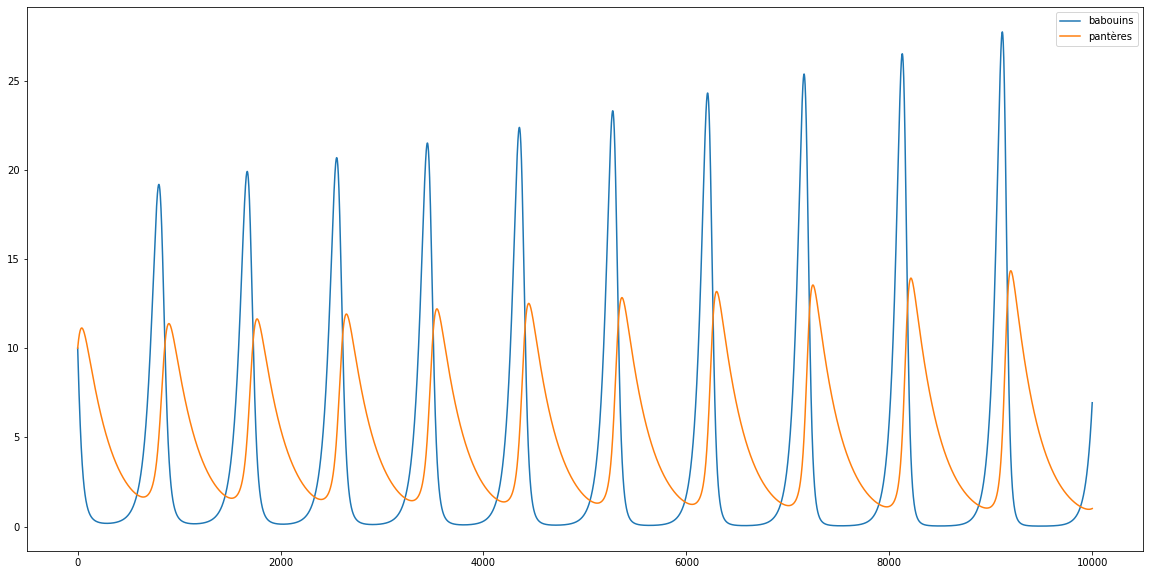

In [50]:
env = Environment(
    preys=10,
    predators=10,
#     alpha=1.1,
    alpha=2,
    beta=.4,
    gamma=.4,
    delta=.1,
    dt=.01
)

env.run_episode(10000)



history = np.array(env.history)
plt.figure(figsize=(20, 10))
plt.plot(history[:, 0], label='babouins')
plt.plot(history[:, 1], label='pantères')
plt.legend()
plt.show()

## Links: 
- https://www.journals.uchicago.edu/doi/10.1086/282870
- https://www.ceremade.dauphine.fr/~vigeral/Memoire2018Fraval.pdf